In [17]:
import numpy as np
import scipy.stats
import scipy.interpolate
import pylab as plt
from scipy.optimize import curve_fit
plt.rcParams['figure.figsize'] = [8, 8]
from astroML.datasets import fetch_dr7_quasar
from tqdm import tqdm

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

# Rejection

100%|██████████| 100000/100000 [00:05<00:00, 17694.70it/s]


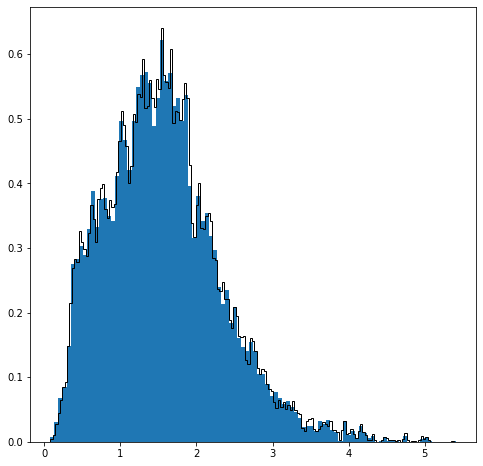

In [18]:
N=100000
counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))), density = True)
x = np.random.uniform(0,max(bins),N)
y = np.random.uniform(0,max(counts),N) #generating points randomly
goodpoints = []

for i in tqdm(range(N)):
    for j in range(len(counts)):
        if bins[j] < x[i] < bins[j+1]:
            if y[i] <= counts[j]:
                goodpoints.append(x[i]) #selecting the points within the histogram

plt.hist(goodpoints,bins = int(np.sqrt(len(goodpoints))), density = True, histtype='step',color='black');

# Inverse transform sampling

[4.000e-04 2.000e-03 5.600e-03 1.010e-02 1.800e-02 3.270e-02 4.780e-02
 6.400e-02 7.940e-02 9.700e-02 1.177e-01 1.354e-01 1.554e-01 1.755e-01
 1.941e-01 2.123e-01 2.342e-01 2.607e-01 2.856e-01 3.080e-01 3.345e-01
 3.638e-01 3.941e-01 4.246e-01 4.542e-01 4.803e-01 5.087e-01 5.419e-01
 5.717e-01 6.021e-01 6.298e-01 6.582e-01 6.847e-01 7.133e-01 7.344e-01
 7.512e-01 7.715e-01 7.897e-01 8.086e-01 8.256e-01 8.414e-01 8.542e-01
 8.656e-01 8.781e-01 8.879e-01 8.990e-01 9.076e-01 9.154e-01 9.229e-01
 9.311e-01 9.386e-01 9.442e-01 9.498e-01 9.546e-01 9.584e-01 9.625e-01
 9.661e-01 9.692e-01 9.726e-01 9.755e-01 9.780e-01 9.800e-01 9.812e-01
 9.825e-01 9.838e-01 9.847e-01 9.864e-01 9.879e-01 9.897e-01 9.907e-01
 9.915e-01 9.916e-01 9.933e-01 9.939e-01 9.948e-01 9.951e-01 9.964e-01
 9.971e-01 9.974e-01 9.979e-01 9.979e-01 9.980e-01 9.984e-01 9.985e-01
 9.986e-01 9.987e-01 9.987e-01 9.992e-01 9.992e-01 9.993e-01 9.993e-01
 9.995e-01 9.998e-01 9.999e-01 9.999e-01 9.999e-01 9.999e-01 9.999e-01
 9.999

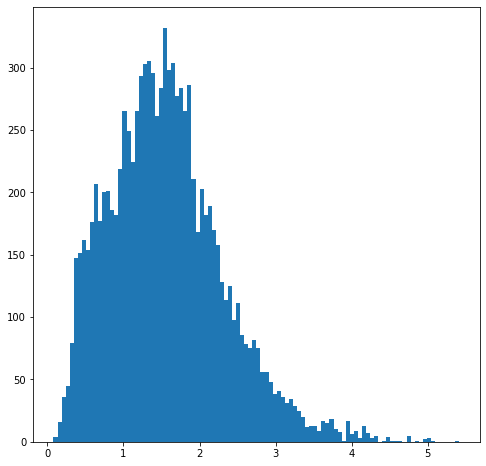

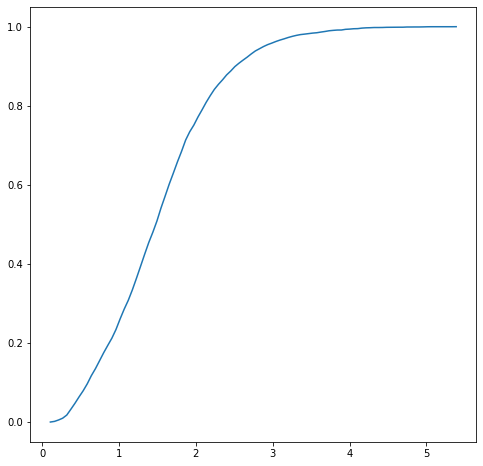

In [19]:
counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))))

x_data = (bins[1:] + bins[:-1]) / 2

cdf_norm = np.cumsum(counts) / np.sum(counts) #comulative density function

print (cdf_norm)
plt.show()
plt.plot(x_data, cdf_norm)

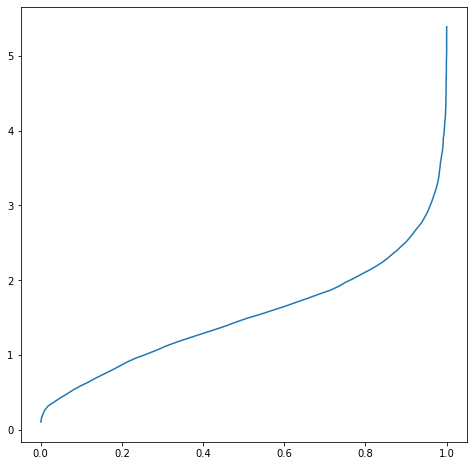

In [20]:
plt.plot(cdf_norm, x_data)
plt.show()

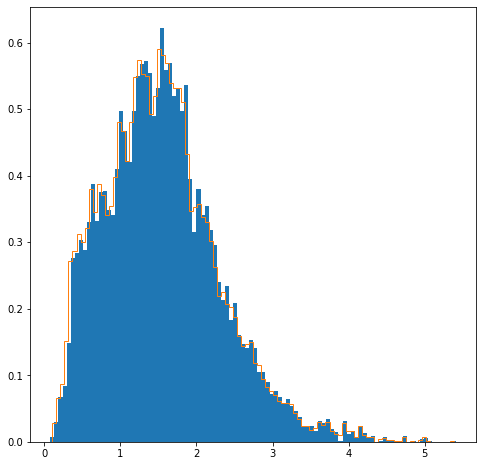

In [21]:
fit = scipy.interpolate.interp1d(cdf_norm, x_data)

x_s = fit(np.random.uniform(min(cdf_norm),max(cdf_norm), N)) #sampling along the cdf

counts, bins, bars = plt.hist(z, bins = int(np.sqrt(len(z))), density=True)
plt.hist(x_s, bins = int(np.sqrt(len(z))), density=True, histtype='step')

plt.show()

# Comparison with an assumed uniform distribution of quasars in comoving volume in the Universe

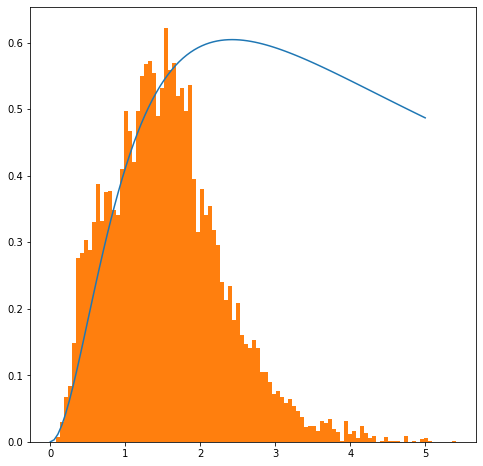

In [26]:
import astropy
astropy.cosmology.Planck18

class uniformredshift(object):
    def __init__(self,zmax):
        self._norm = None
        self._pdfmax = None
        self.zmax=zmax

    def _eval(self,z_vals):
        return ((4.*np.pi*astropy.cosmology.Planck18.differential_comoving_volume(z_vals).value))


    def norm(self):
        if self._norm is None:
            self._norm = scipy.integrate.quad( self._eval, 0, self.zmax)[0]
        return self._norm


    def eval(self,z_vals):
        return self._eval(z_vals)/self.norm()

        return np.array(zsample)
    
redshiftpdf = uniformredshift(zmax = 5)

x = np.linspace(0,5,100)
plt.plot(x,2.4*redshiftpdf.eval(x))

plt.hist(z, bins = int(np.sqrt(len(z))), density=True);